<a href="https://colab.research.google.com/github/pratik-99/Bone-Age-Prediction/blob/main/bone_age_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Saving 1377.png to 1377 (3).png
Loading -

Done!





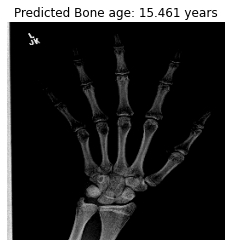

In [ ]:
import tensorflow as tf
from keras_preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import itertools
import threading
import time
import sys


# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('/content/drive/MyDrive/BE_Project/Model/best_model.h5', compile=False)

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  #img=tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/BE_Project/Images/Original_Images/boneage-training-dataset/boneage-training-dataset/1379.png',target_size=(256,256))
  img=tf.keras.preprocessing.image.load_img(fn,target_size=(256,256))

  img=tf.keras.preprocessing.image.img_to_array(img)
  img=tf.keras.applications.xception.preprocess_input(img) 

  mean_bone_age = 127.3207517246848
  std_bone_age = 41.18202139939618

  pred = mean_bone_age + std_bone_age*(new_model.predict(np.array([img])))

  done = False
  #here is the animation
  def animate():
      for c in itertools.cycle(['|', '/', '-', '\\']):
          if done:
              break
          sys.stdout.write('\rLoading ' + c)
          sys.stdout.flush()
          time.sleep(0.01)

  t = threading.Thread(target=animate)
  t.start()

  #long process here
  time.sleep(5)
  done = True

  print("\n")
  print("\rDone!")
  print("\n")

  
  img = img/np.amax(img)
  img = np.clip(img, 0, 1)

  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.title('Predicted Bone age: {} years'.format(round(pred[0][0]/12.0,3)))
  plt.axis('off')
  plt.show()